# Statistische Modelle in den Geowissenschaften

Zettel 4

Abgabe bis Mittwoch 24.05.2023 um 15:00Uhr im Whiteboard.

## Aufgabe 1: $k$-means Clustering (7 Punkte)

Clustering-Algorithmen haben das Ziel, Datenpunkte anhand eines festgelegten Ähnlichkeitsmaßes (und das ist entscheidend!) zu gruppieren. Hier sollen Sie den Cluster-Algorithmus $k$-means anwenden. Ein Algorithmus, der einen gegebenen (auch hochdimensionalen) Datensatz in $k$ Gruppen (cluster) einteilt. Der Algorithmus arbeitet folgendermaßen (Darstellung etwas vereinfacht):

0. Wähle eine Clusteranzahl $k$ und wähle zur Initialisierung $k$ Clusterzentren (Zentroide). Diese Zentroide können zufällig im Zustandsraum verteilt sein oder es können einfach zufällig Elemente aus dem Trainings-Datensatz gezogen werden, die als Zentroide dienen. (Initialisierung) 
1. Ordne jedem Datenpunkt dem Cluster zu, dessen Clusterzentrum (Zentroid) am nächsten an diesem Punkt ist. ("Nähe" wird durch das Abstandsmaß bestimmt, das kann z.B. die Euklid'sche Distanz sein.)
2. Berechne alle $k$ Clusterzentren neu: Der Mittelwert (in allen Dimensionen) aller Datenpunkte in einem Cluster ergibt das neue Clusterzentrum (Zentroid).
3. Abbruchkriterium erfüllt? (z.B. "maximale Anzahl an Iterationen erreicht" oder "Clusterzentren verändern sich nur wenig") Sonst gehe zu 1.

Wir verwenden in der Übung der Einfachheit halber simulierte Daten:

In [2]:
x = as.matrix(read.table("../../daten/cluster_sample_data.csv", head=FALSE))

Aufgaben:

1. Skalieren Sie die Daten mit
```r
x <- as.data.frame(scale(x))
``` 
und plotten Sie den Datensatz in einem Scatterplot. Stellen Sie anhand der Abbildung eine Vermutung auf, in wieviele Cluster sich die Daten aufteilen könnten. Erklären Sie was die Funktion `scale()` macht. (1 Punkt)

In [3]:
x <- as.data.frame(scale(x))

> `scale()`:  The normalizing of a dataset using the mean value and standard deviation  --> centers and scales the columns of a matrix --> enables comparison of two columns measured in different units

> if numeric input: `scale()` subtracts the values of each column by the matching “center” value from the argument.

In diesem Beispiel werden die Daten in den Spalten von "x" mithilfe von scale() skaliert. Anschließend wird ein Scatterplot erstellt, wobei die erste Spalte von "x" auf der x-Achse und die zweite Spalte von "x" auf der y-Achse abgebildet wird. Die skalierten Daten werden als Punkte im Scatterplot dargestellt.

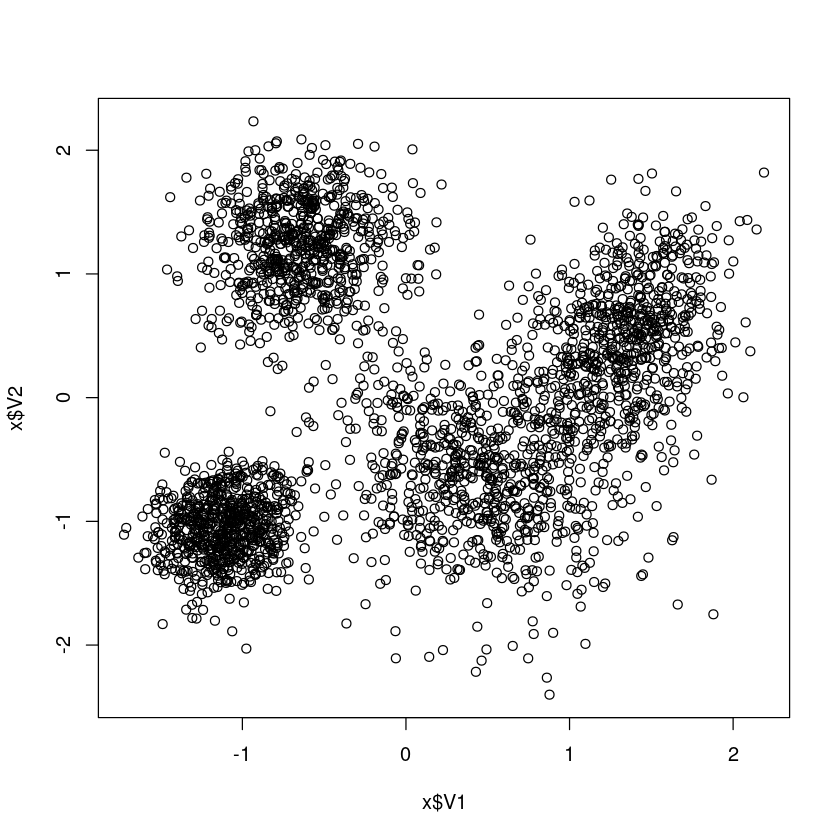

In [4]:
plot(x$V1,x$V2)


> vermutlich sind es 4 Cluster

2. Wenden Sie den Clustering-Algorithmus $k$-means auf die Daten an und geben Sie die Clusteranzahl fest vor (Vermutung aus Aufgabe 1). Sie können dazu die Funktion `kmeans()` verwenden. Als initiale Clusterzentren wählen Sie zufällig gezogene Punkte aus dem Datensatz. Informieren Sie sich über die entsprechende Hilfe über die Optionen dazu. (1 Punkt)


In [6]:
?kmeans

In [5]:
set.seed(123)
km = kmeans(x, centers = 4, nstart = 1)
km

K-means clustering with 4 clusters of sizes 720, 715, 713, 652

Cluster means:
          V1         V2
1 -1.0879678 -1.0517436
2 -0.6385558  1.2171462
3  0.5079313 -0.6585731
4  1.3462411  0.5468689

Clustering vector:
   [1] 4 3 3 2 2 2 2 2 4 2 4 4 4 1 1 2 2 3 2 1 4 1 3 1 3 2 1 3 3 2 4 2 1 4 1 3 3
  [38] 4 2 3 4 4 4 4 1 2 2 4 4 1 2 4 2 1 3 4 2 2 4 2 1 1 2 1 3 2 1 1 2 2 4 2 1 1
  [75] 2 3 1 3 3 4 3 2 2 3 2 4 1 1 3 2 3 2 2 2 4 2 2 1 3 3 2 2 2 4 3 1 1 4 3 3 3
 [112] 3 3 1 3 2 4 1 2 1 4 4 2 2 3 2 4 2 2 2 1 4 4 2 3 1 4 4 3 2 1 1 4 4 3 2 3 1
 [149] 3 2 2 3 4 1 1 4 1 1 2 3 2 1 3 1 2 2 1 4 3 3 3 1 2 4 1 3 4 3 3 1 1 3 3 3 4
 [186] 2 3 1 2 3 3 1 3 3 4 1 4 1 2 2 4 4 2 4 1 2 2 1 3 4 3 3 1 4 3 4 3 1 2 4 3 2
 [223] 1 2 3 3 1 1 2 1 2 4 1 1 3 1 4 2 1 2 3 1 3 4 4 1 1 1 4 3 3 3 1 4 2 4 3 4 3
 [260] 1 2 2 1 1 1 3 1 3 3 2 3 2 3 1 1 2 2 4 1 3 3 3 1 4 3 4 3 2 2 2 1 1 2 2 3 1
 [297] 1 4 3 1 3 3 1 4 2 1 4 2 2 2 3 2 2 3 2 3 3 1 1 4 1 1 4 3 1 2 3 4 1 3 3 1 2
 [334] 4 1 3 4 3 4 2 3 1 4 4 3 1 1 2 3 2 4 4 2 1 2 4



3. Plotten Sie die Daten erneut und färben Sie die Datenpunkte anhand ihrer Cluster-Zugehörigkeit. (1 Punkt)


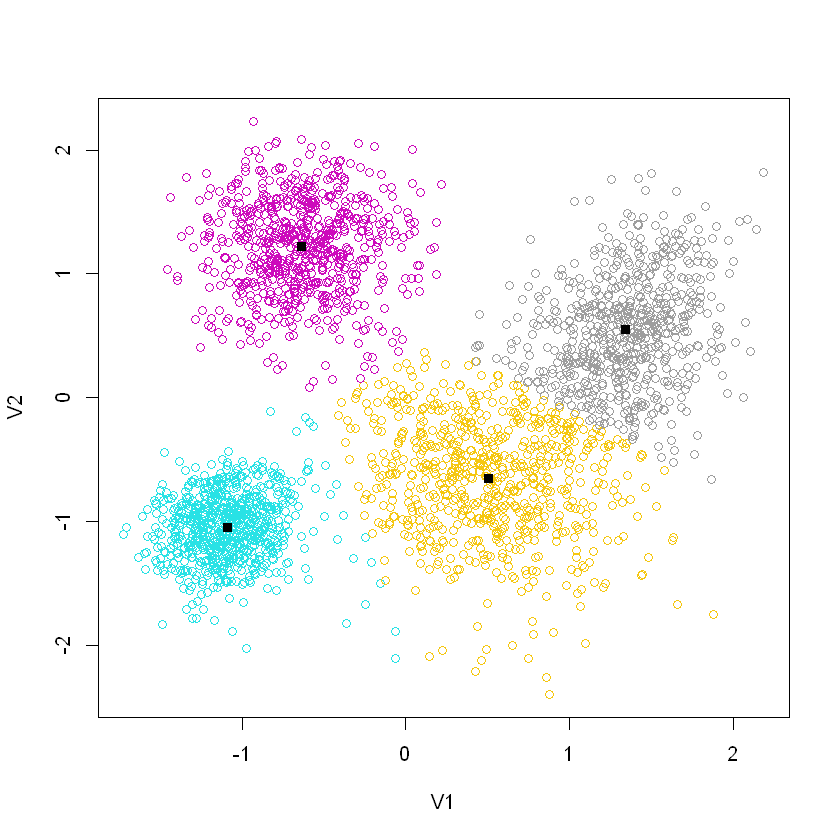

In [5]:
plot(x,col=km$cluster+4)
points(km$center,col= "black",pch=15,cex=1)


4. Bestimmmen Sie systematisch die optimale Anzahl an Clustern (wählen Sie dazu alle $k$ zwischen 2 und 10). Dazu führen Sie $k$-means für jedes $k$ aus und berechnen Sie die Summe der Euklidischen Distanz aller Datenpunkte $x_i$ zu ihren jeweiligen Clusterzentren $c_k$ (Within-Cluster-Sum of Squared Errors, WSS). 
$$
WSS=\sum_{k=1}^K \sum_{x_i \in C_k} \vert\vert x_i-c_k \vert\vert ^2
$$
mit der Menge von Clustern $C$, den Clustern $k$, der Anzahl an Clustern $K$, den Datenpunkten $x_i$ im Cluster $C_k$, der Euklidischen Distanz ($\vert\vert ... \vert\vert$) und dem Clusterzentrum (Zentroid) $c_k$.
Diese sollte mit höherer Anzahl an Clustern stetig abnehmen, jedoch sollte die WSS ab der optimalen Cluster-Anzahl nur noch geringfügig sinken, für höhere Anzahlen an Clustern. Stellen Sie die Entwicklung grafisch dar ($WSS$ gegen $k$) und Begründen Sie anhand dieser Grafik, wie viele Cluster Sie wählen würden. (2 Punkte)


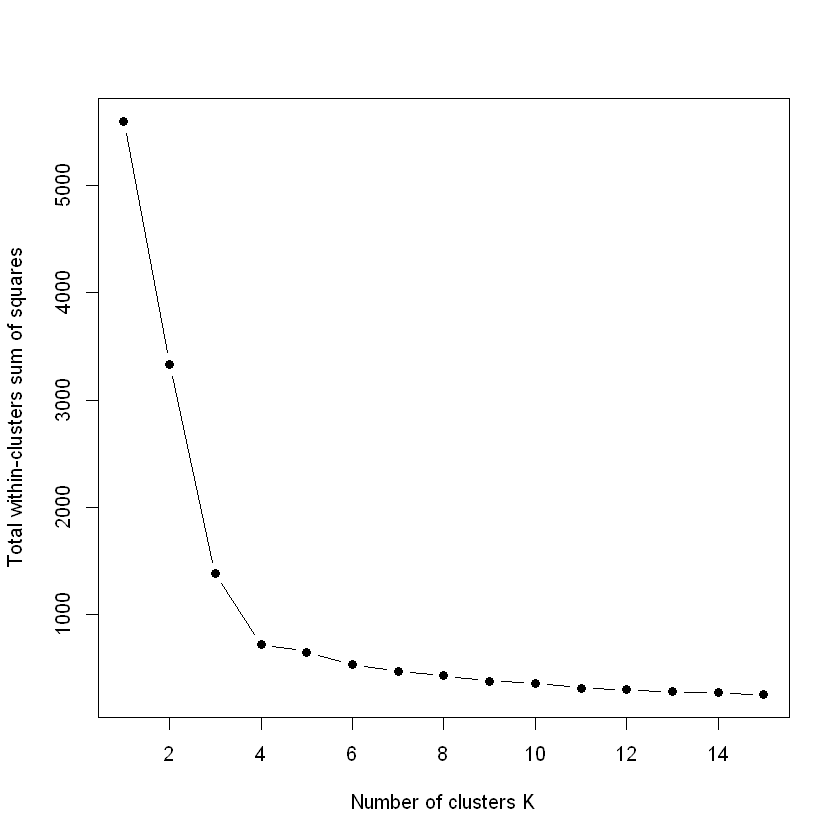

In [6]:
km_centers= 1:15
WSS_list = list()

for (c in km_centers) {
    km_iter = kmeans(x, centers = c, nstart = 1)
    #WSS = km_iter$betweenss/km_iter$totss * 100
    WSS_list  = append(WSS_list, km_iter$tot.withinss)
    
} 

plot(km_centers, WSS_list,
     type="b", pch = 19,
     xlab="Number of clusters K",
     ylab="Total within-clusters sum of squares")

* Für die optimale Anzahl an Clustern kann man sich mit Hilfe der Elbow-Methode entscheiden.
> Elbow-Methode: Prozentsatz der erklärten Varianz in Abhängigkeit von der Anzahl der Cluster --> Man wählt die Anzahl der Cluster so, dass das Hinzufügen eines weiteren Clusters die Daten nicht wesentlich besser modelliert. 
* D.h. z.B hier im Plot: Die ersten Cluster viel Information hinzufügen (viel Varianz erklären), aber an einem bestimmten Punkt wird die elkärte Varianz nicht wesentlich steigen --> Abknicken der Kurve  --> Anzahl der Cluster wird an diesem Punkt gewählt

Hierbei scheint dass bei k = 4 der Fall zu sein, der erste Eindruck bestätigt sich also.

***
5. Schauen Sie sich einen weiteren Datensatz an (Scatterplot):

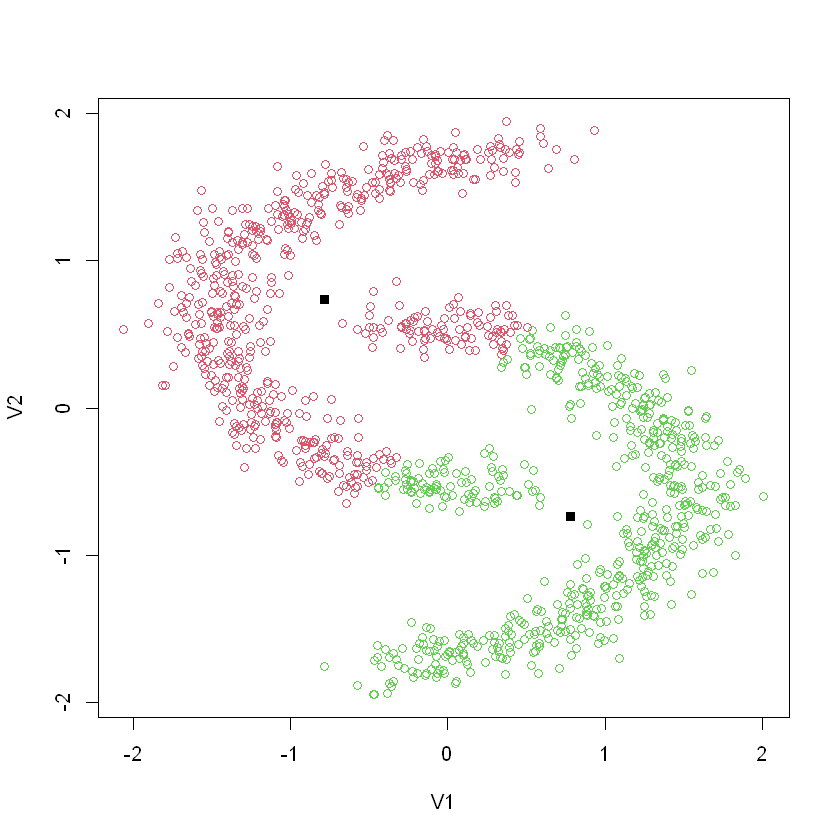

In [7]:
x_moons = as.matrix(read.table("../data/cluster_sample_data_moons.csv", head=FALSE))
x_moons <- as.data.frame(scale(x_moons))

set.seed(123)
km_moons = kmeans(x_moons, centers = 2, nstart = 1)


plot(x_moons,col=km_moons$cluster+1)
points(km_moons$center,col= "black",pch=15,cex=1)


In diesem ebenfalls generierten Datensatz sind eindeutig 2 Cluster zu erkennen, die aber vom KMeans-Clustering nicht gut erkannt werden (überprüfen Sie dies mit Plots analog 3.)
- Warum klappt das Clustering nach KMeans hier nicht gut? (1 Punkt)
- Finden Sie eine Möglichkeit eines Clusterings, dass hier besser funktioniert und potten Sie wieder inkl. Färbung der Clusterzugeörigkeit(Tipp: Ende der Vorlesung) (1 Punkt)

Allgemeine Hinweise: Oft, wenn man mit Zufallsdaten arbeitet (zum Beispiel zufällig gezogene initiale Cluster-Zentren), kann es passieren, dass einzelne Ergebnisse nicht sinnvoll sind. Meistens hilft es, den Zufallsvorgang einfach erneut auszuführen (und natürlich zu verstehen, warum es manchmal nicht funktioniert).

***

Das KMeans-Clustering kann in diesem Fall möglicherweise nicht gut funktionieren, weil die Datenpunkte in den beiden Clustern ungleichmäßig verteilt sind. KMeans basiert auf der Annahme, dass die Cluster kugelförmig und von ähnlicher Größe sind. Wenn diese Annahme nicht erfüllt ist, kann das Clustering schlechte Ergebnisse liefern.


Eine mögliche Alternative, die besser funktionieren könnte, ist das sogenannte "DBSCAN" (Density-Based Spatial Clustering of Applications with Noise). DBSCAN basiert auf der Dichte der Datenpunkte und kann Cluster identifizieren, auch wenn sie nicht kugelförmig oder von ähnlicher Größe sind.




<font color=red size=3>6.5 / 7 Pkt</font>

<font color=red>(Beim letzten Aufgabenteil nennt Ihr mit DBSCAN eine geeignete ALternative, für volle Punkte fehlt aber die Umsetzung und der Plot)</font>

## Aufgabe 2: Random Forests (5 Punkte)

In dieser Übung werden wir einen RF aus aktuellen Berliner Wetterdaten erstellen. Lesen Sie dazu die Datenbeschreibung im Refubium:   https://refubium.fu-berlin.de/handle/fub188/38460

und laden die Datei 01_Tempelhof-1_2006_Daten.zip herunter: https://refubium.fu-berlin.de/bitstream/handle/fub188/38460/01_Tempelhof-1_2006_Daten.zip?sequence=2&isAllowed=y

Zu diesem Datensatz gibt es nochmal eine gesonderte Beschreibung welche Sie sich gern ansehen können: https://refubium.fu-berlin.de/bitstream/handle/fub188/38460/01_Tempelhof-1_Beschreibung.pdf?sequence=3&isAllowed=y

Das Einlesen und Benennen der Daten geht recht einfach (die Variablennamen stehen in der gezipten .csv Datei). In R verwendet man hierfür am besten einen sogenannten Data-Frame. Die Funktion `read.table()` erzeugt diesen automatisch:

In [8]:
variables <- c("Jahr","Monat","Tag","Stunde","Minute","WDay","WoY","DoY",
"air_temperature"                            ,"air_temperature_guete",                # C
"relative_humidity"                          ,"relative_humidity_guete",              # %
"duration_of_sunshine"                       ,"duration_of_sunshine_guete",           # min                       
"air_pressure_at_station_level"              ,"air_pressure_at_station_level_guete",  # hPa              
"air_temperature2"                           ,"air_temperature2_guete",                   # C      
"height_of_precipitation"                    ,"height_of_precipitation_guete",            # mm       
"wind_speed_maximum"                         ,"wind_speed_maximum_guete",                 # m/s        
"soil_temperature"                           ,"soil_temperature_guete",                   # C        
"wind_speed_mean"                            ,"wind_speed_mean_guete",                    # m/s       
"global_solar_radiation"                     ,"global_solar_radiation_guete",             # W/m^2        
"air_temperature3"                           ,"air_temperature3_guete",                   # C        
"air_temperature4"                           ,"air_temperature4_guete",                   # C       
"wind_from_direction_at_wind_speed_maximum"  ,"wind_from_direction_at_wind_speed_maximum_guete",  # degree 
"wind_from_direction"                        ,"wind_from_direction_guete")                        # degree

data <- read.table(unzip("../data/01_Tempelhof-1_2006_Daten.zip","01_Tempelhof-1_2006_Daten.csv"),col.names=variables)


Benutzen sie z.B. die `str()` und die `dim()` Funktion um sich einen Überlick über die Daten zu verschaffen.
Sie werden sehen, das wir Variablen mit Integer, Real und Character Inhalten haben. Die Character Variablen betreffen allerdings nur die "_guete" Variablen welche kaum Informationen enthalten. Wir entfernen sie im Weiteren:

In [9]:
dim(data)

[1] 525600     36

In [10]:
str(data)

'data.frame':	525600 obs. of  36 variables:
 $ Jahr                                           : int  2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 ...
 $ Monat                                          : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Tag                                            : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Stunde                                         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Minute                                         : int  0 1 2 3 4 5 6 7 8 9 ...
 $ WDay                                           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ WoY                                            : int  1 1 1 1 1 1 1 1 1 1 ...
 $ DoY                                            : int  1 1 1 1 1 1 1 1 1 1 ...
 $ air_temperature                                : num  2.3 2.4 2.3 2.4 2.4 2.4 2.4 2.4 2.4 2.5 ...
 $ air_temperature_guete                          : chr  "g" "g" "g" "g" ...
 $ relative_humidity                              : num  99 99 99 99 99 99 99 99 99 99 ...
 $ relati

In [11]:
 data2use <- data[c("Jahr","Monat","Tag","Stunde","Minute","WDay","WoY","DoY","air_temperature",
                    "relative_humidity","duration_of_sunshine","air_pressure_at_station_level",
                    "height_of_precipitation","wind_speed_maximum" ,"soil_temperature" ,"wind_speed_mean" ,
                    "global_solar_radiation", "wind_from_direction_at_wind_speed_maximum","wind_from_direction")]

Wir erzeugen nun aus `data2use` einen RF wie in der Vorlesung gezeigt. Verwenden also die Funktion `randomForest()` aus dem `randomForest` package. Zielgröße ist in diesem Fall `soil_temperature`. Diese soll aus allen anderen Variablen in `data` bestimmt werden. 


In [12]:
library(randomForest)
model <- randomForest(
   formula = soil_temperature ~ ., data=data2use, na.action="na.omit" , sampsize=20000, mtry=3, ntree=150)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.



### A) (1 Punkt)

Wenden sie die `plot()` und die `varImpPlot()` Funktion auf den erzeugeten RF an. Diskutieren sie die Ergebnisse kurz in jeweils 1-2 Sätzen.

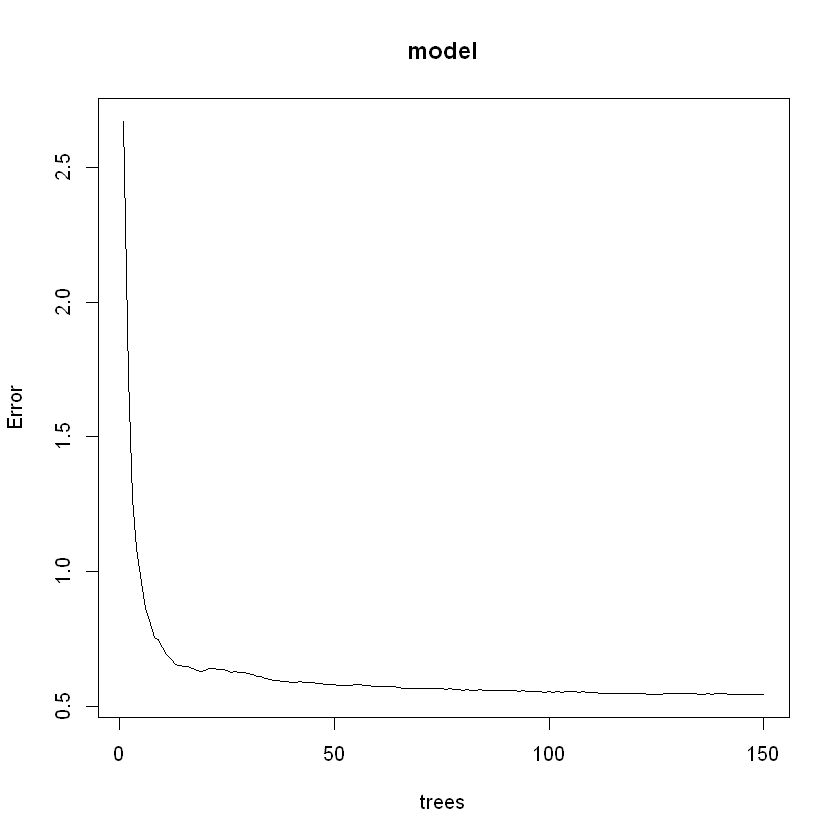

In [13]:
## A)

plot(model)

Bei der Anwendung der plot()-Funktion auf den Random Forest wird ein Diagramm erzeugt, das die Struktur und die wichtigsten Eigenschaften des Random Forests darstellt. Es zeigt die Anzahl der Bäume im Wald und die Fehlerrate. Die Kurve zeigt dass die Fehlerquote bei wenig Bäumen am höchsten ist und ab ungefähr 15 Bäumen der Fehler relativ gleich bleibt. In diesem Modell nimmt die Bodentemperatur als Reaktion auf andere Variablen im Wald stark ab und stabilisiert sich nach einem bestimmten Punkt des Rückgangs.

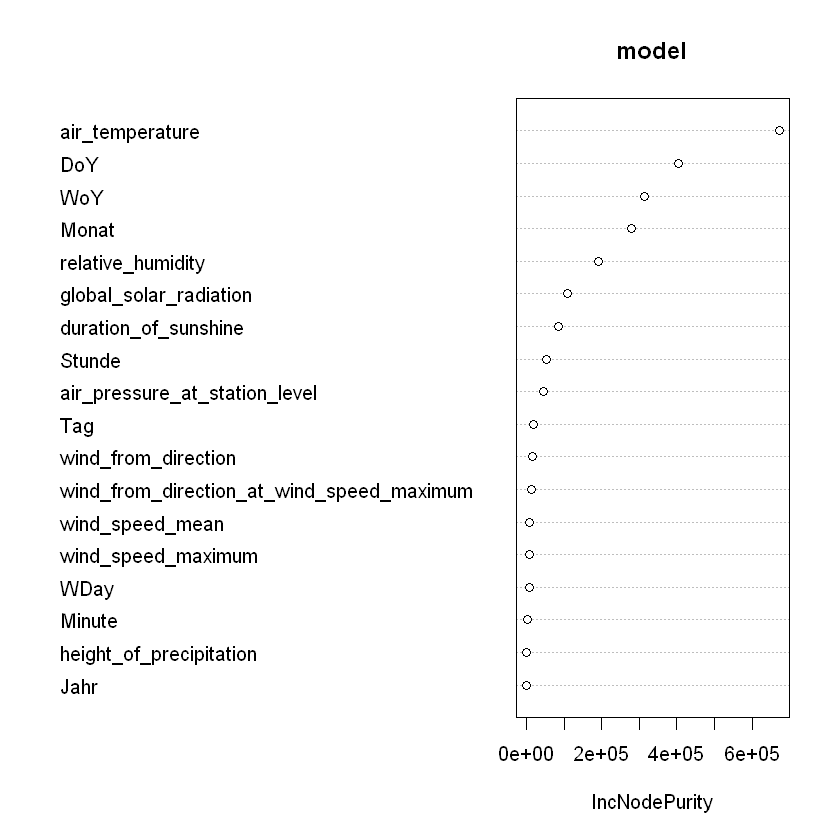

In [14]:
varImpPlot(model)

Beim Aufrufen der varImpPlot()-Funktion wird ein Variable Importance Plot erstellt, der die Bedeutung der einzelnen Variablen für die Vorhersage im Random Forest anzeigt. Die Variablen werden nach ihrer Wichtigkeit sortiert dargestellt, wobei die bedeutendsten Variablen oben aufgeführt sind.  Eine hohe Importance für eine Variable bedeutet, dass diese Variable einen großen Einfluss auf die Trennung der Klassen im Modell hat, hier die air_temperature. Ein niedriger Wert bedeutet, dass die Variable weniger relevant ist, hier das Jahr. Durch die Betrachtung dieses Plots können wichtige Variablen identifiziert werden, die zur Vorhersage beitragen, und weniger wichtige Variablen können möglicherweise vernachlässigt werden, um die Modellkomplexität zu reduzieren oder die Laufzeit zu verbessern.



### B) (2 Punkte)

Durch `model$mse` erhält man Zugriff auf die geplottete Fehlerkurve. Plotten sie diese für verschiedene RFs welche mit `mtry`= 1 bis 10 traineiert wurden. `mtry` ist ein Metaparameter des Entscheidungsbaumgenerierung. Lesen Sie sich die Beschreibung zu `mtry` in der die R-Hilfe `?randomForest` durch. Plotten sie die verschiedenen Kurven idealerweise in einem Plot. Diskutieren sie das Ergebnis. (HINWEIS: In diesem Teil kann es gut sein, dass die Ausführung des Codes eine Weile dauert)


***
 > `mtry`: die Anzahl der Variablen die zufällig als Kandidaten in jedem Split des random forests  gewählt werden --> bei mtry = 1 ist die Auswahl der Splitkandidaten demnach komplett zufällig

In [15]:
library(randomForest)

# Daten einlesen und vorbereiten
data2use <- data[c("Jahr","Monat","Tag","Stunde","Minute","WDay","WoY","DoY","air_temperature",
                    "relative_humidity","duration_of_sunshine","air_pressure_at_station_level",
                    "height_of_precipitation","wind_speed_maximum" ,"soil_temperature" ,"wind_speed_mean" ,
                    "global_solar_radiation", "wind_from_direction_at_wind_speed_maximum","wind_from_direction")]

# Datenrahmen für Fehlerwerte
mse_values <- data.frame(mtry = numeric(0), mse = numeric(0))

# Schleife über verschiedene mtry-Werte
for (mtry in 1:10) {
  # Random Forest trainieren
  model <- randomForest(
    formula = soil_temperature ~ ., 
    data = data2use, 
    na.action = "na.omit", 
    sampsize = 20000, 
    mtry = mtry, 
    ntree = 150
  )
  
  # Fehlerwert speichern
  mse_values <- rbind(mse_values, data.frame(mtry = mtry, mse = model$mse))
}



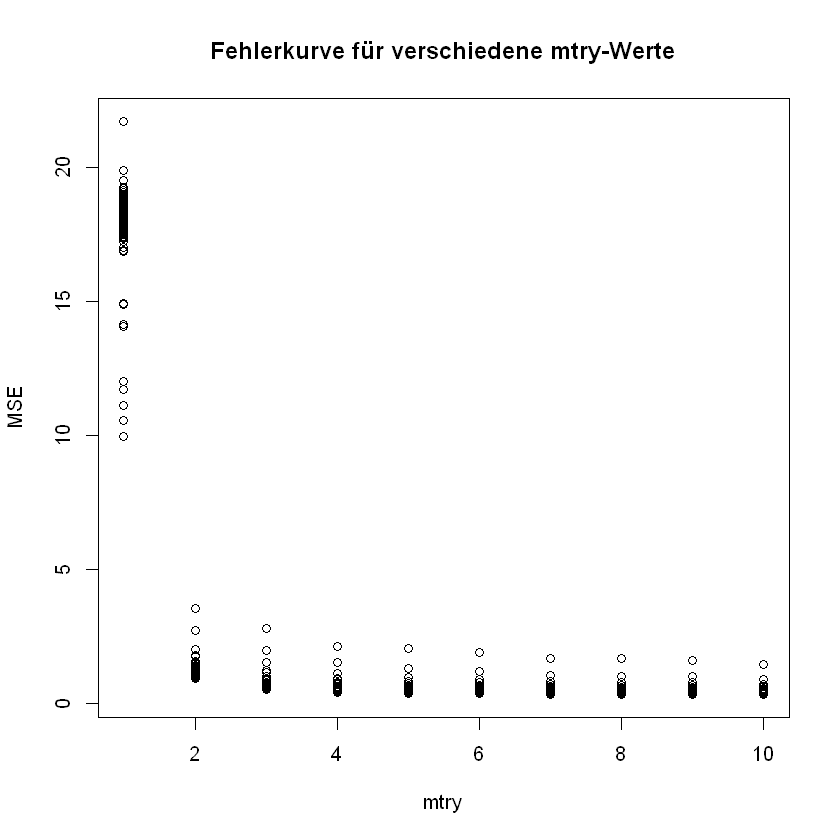

In [16]:
# Fehlerkurven plotten

plot(
  mse ~ mtry, 
  data = mse_values, 
  type = "p", 
  xlab = "mtry", 
  ylab = "MSE", 
  main = "Fehlerkurve für verschiedene mtry-Werte"
)

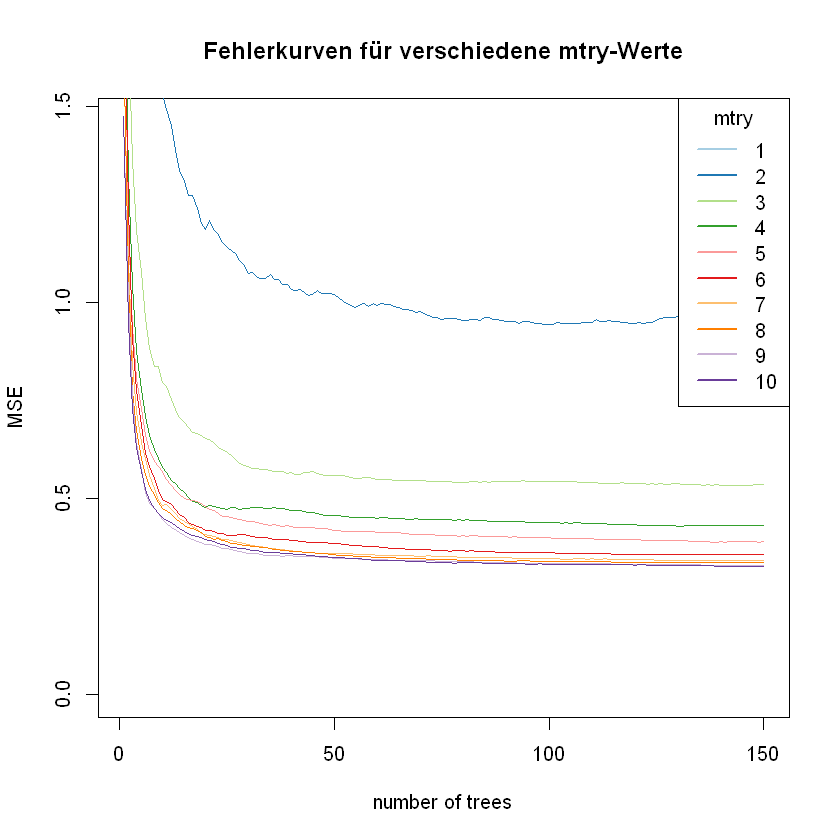

In [17]:
library(RColorBrewer)
col_palette <- brewer.pal(10, "Paired")
mtry_list <- 1:10

# Erstellen des leeren Plots
plot(1, type = "n", xlim = c(1, 150), ylim = c(0, max(model$mse)),
     xlab = "number of trees", ylab = "MSE", main = "Fehlerkurven für verschiedene mtry-Werte")

# Iteration über mtry-Werte
for (m in mtry_list) {
  model_iter <- randomForest(formula = soil_temperature ~ ., 
                             data = data2use, na.action = "na.omit", 
                             sampsize = 20000, mtry = m, ntree = 150)
  lines(x = 1:150, y = model_iter$mse, type = "l", col = col_palette[m])
}

# Legende hinzufügen
legend("topright", legend = mtry_list, col = col_palette, lty = 1, lwd = 2,
       title = "mtry")



Wenn die Kurve mit einem höheren mtry-Wert näher am Nullpunkt (geringerer MSE) liegt und die Kurve mit dem niedrigsten mtry-Wert weiter entfernt ist (höherer MSE), bedeutet dies, dass ein höherer Wert für mtry zu einer besseren Modellleistung führt. Dies liegt daran, dass ein höherer mtry-Wert mehr Variablen für die Entscheidung verwendet, was zu einer besseren Anpassung des Modells an die Daten führen kann.
Ein niedrigerer mtry-Wert kann zu einer Überanpassung (hoher MSE) führen, da das Modell weniger Variablen für die Entscheidung berücksichtigt und dadurch möglicherweise wichtige Informationen verpasst. Ein höherer mtry-Wert hingegen kann zu einer besseren Stabilität und Generalisierung führen, indem mehr Variablen in Betracht gezogen werden.

"Ein niedrigerer mtry-Wert kann zu einer Überanpassung (hoher MSE) führen, da das Modell weniger Variablen für die Entscheidung berücksichtigt und dadurch möglicherweise wichtige Informationen verpasst" - 
<font color=red>Der Begriff "Überanpassung" (Overfitting) wird hier nicht ganz richtig verwendet. Overfitting bedeutet, dass das Modell sich (oft aufgrund der Berücksichtigung <b>zu vieler</b>, teils zufälliger) Informationen zu stark an die Trainingsdaten anpasst und dann eben nicht mehr gut auf neue Daten "generalisiert". Overfitting hätte man hier (wenn überhaupt) eher für sehr große Werte von `mtry`</font>



### C) (2 Punkte)

Wiederholen sie **Aufgabe 1B** mit dem ungefilterten Datensatz `data`. Was fällt Ihnen hier auf und wie erklären sie sich das? (HINWEIS: In diesem Teil kann es gut sein, dass die Ausführung des Codes eine Weile dauert)

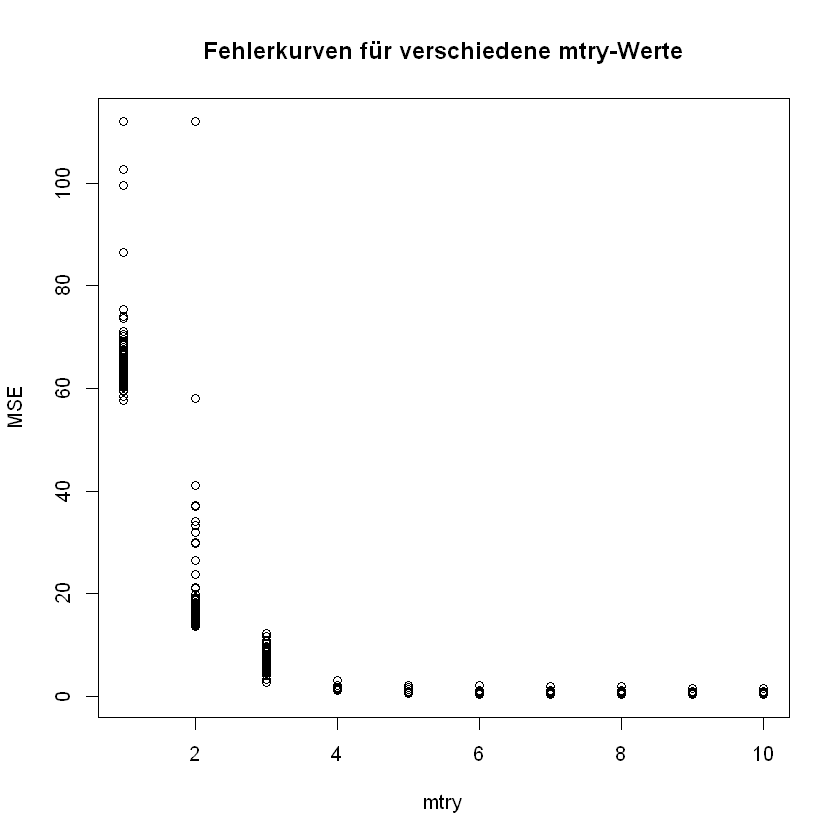

In [18]:
# Daten einlesen und vorbereiten

# Datenrahmen für Fehlerwerte
mse_values <- data.frame(mtry = numeric(0), mse = numeric(0))

# Schleife über verschiedene mtry-Werte
for (mtry in 1:10) {
  # Random Forest trainieren
  model <- randomForest(
    formula = soil_temperature ~ ., 
    data = data, 
    na.action = "na.omit", 
    sampsize = 20000, 
    mtry = mtry, 
    ntree = 150
  )
  
  # Fehlerwert speichern
  mse_values <- rbind(mse_values, data.frame(mtry = mtry, mse = model$mse))
}

# # Fehlerkurven plotten
# plot(
#   mse ~ mtry, 
#   data = mse_values, 
#   type = "p", 
#   xlab = "mtry", 
#   ylab = "MSE", 
#   main = "Fehlerkurven für verschiedene mtry-Werte"
# )

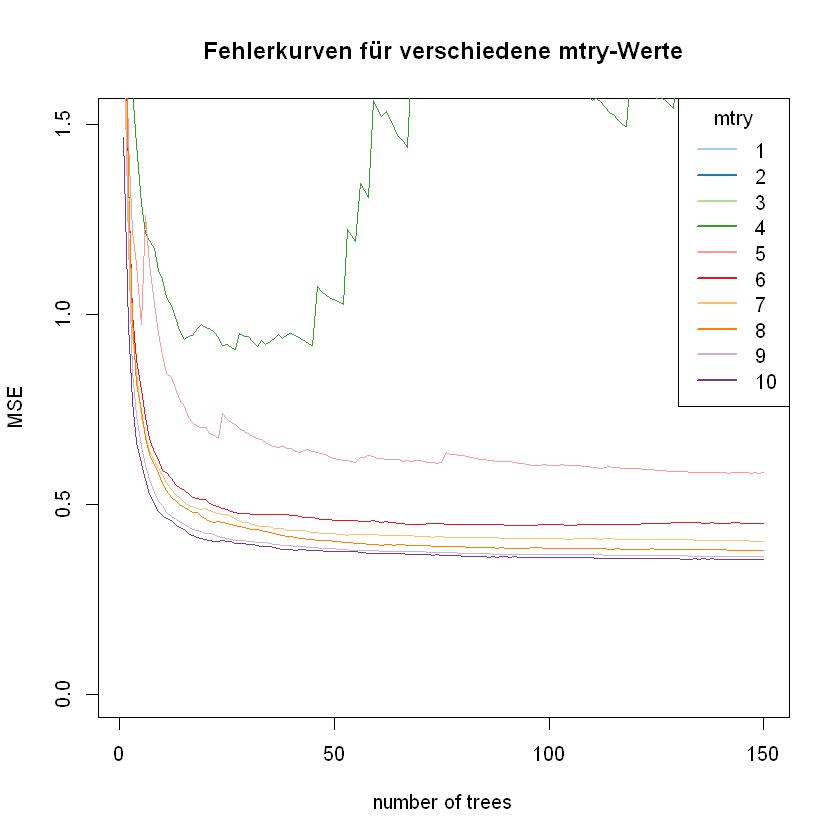

In [19]:
col_palette <- brewer.pal(10, "Paired")
mtry_list <- 1:10

# Erstellen des leeren Plots
plot(1, type = "n", xlim = c(1, 150), ylim = c(0, max(model$mse)),
     xlab = "number of trees", ylab = "MSE", main = "Fehlerkurven für verschiedene mtry-Werte")

# Iteration über mtry-Werte
for (m in mtry_list) {
  model_iter <- randomForest(formula = soil_temperature ~ ., 
                             data = data, na.action = "na.omit", 
                             sampsize = 20000, mtry = m, ntree = 150)
  lines(x = 1:150, y = model_iter$mse, type = "l", col = col_palette[m])
}

# Legende hinzufügen
legend("topright", legend = mtry_list, col = col_palette, lty = 1, lwd = 2,
       title = "mtry")


Eine steil abfallende Fehlerkurve kann darauf hinweisen, dass das Modell bei höheren mtry-Werten deutlich an Leistung gewinnt. Dies deutet auf eine höhere Modellkomplexität hin, da mehr Variablen für die Entscheidungsfindung verwendet werden. Wenn die Fehlerkurve für verschiedene mtry-Werte relativ flach ist und keine deutlichen Spitzen oder Täler aufweist, deutet dies auf eine gewisse Stabilität des Modells hin. Es bedeutet, dass die Leistung des Modells nicht stark von der Wahl des mtry-Werts abhängt. In unserem Fall, ist es so dass die Fehlerkurve zunächst sehr stark fällt und so mit aussagt, dass bei höheren mtry-Werten deutlich an Leistung gewinnt, aber ab 4 mtry die Fehlerkurve sehr flach ist und keine deutlichen Spitzen oder Täler aufweist und somit auf eine gewisse Stabilität hindeutet.


<font color=red>Beachtet: `mtry` und die Anzahl der Bäume im Wald sind 2 verschiedene Dinge.Im Plot sind 10 Kurven, nämlich eine für jeden `mtry`-Wert von 1-10. Und die x-Achse des Plots repräsnetiert die Anzahl an Bäumen.</font>

<font color=red size=3> 4/5 Punkte für Aufgabe 2</font>

<font color=red size=4> 10.5 / 12 Pkt für Zettel 4</font>